# 回归异常值诊断 Regression Outliers Detection #

## 名词说明 ##
https://github.com/0wliver/Olida/tree/master/Statistical%20Analysis/Regression%20Outliers%20Detection

In [1]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

## 样本 ##
**犯罪率和其它变量的关系数据集**

https://stats.idre.ucla.edu/r/dae/robust-regression/

In [2]:
origin_data = pd.read_stata(filepath_or_buffer='crime.dta')
# origin_data.set_index(keys='state',inplace=True, drop=True)
origin_data.head(10)

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1.0,ak,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,2.0,al,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,3.0,ar,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,4.0,az,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,5.0,ca,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5
5,6.0,co,567,5.8,81.800003,92.500000,84.400002,9.900000,12.1
6,7.0,ct,456,6.3,95.699997,89.000000,79.199997,8.500000,10.1
7,8.0,de,686,5.0,82.699997,79.400002,77.500000,10.200000,11.4
8,9.0,fl,1206,8.9,93.000000,83.500000,74.400002,17.799999,10.6
9,10.0,ga,723,11.4,67.699997,70.800003,70.900002,13.500000,13.0


In [3]:
origin_data.loc[:,['crime','single','poverty']].describe()

,crime,single,poverty
count,51.000000,51.000000,51.000000
mean,612.843137,11.325491,14.258823
std,441.100323,2.121494,4.584241
min,82.000000,8.400000,8.000000
25%,326.500000,10.050000,10.700000
50%,515.000000,10.900000,13.100000
75%,773.000000,12.050000,17.400000
max,2922.000000,22.100000,26.400000


In [4]:
ols_model = smf.ols(formula='crime ~ poverty + single', data=origin_data)
ols_res = ols_model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     57.96
Date:                Fri, 05 Oct 2018   Prob (F-statistic):           1.58e-13
Time:                        16:30:07   Log-Likelihood:                -351.09
No. Observations:                  51   AIC:                             708.2
Df Residuals:                      48   BIC:                             714.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1368.1887    187.205     -7.308      0.0

In [5]:
rlm_model = smf.rlm(formula='crime ~ poverty + single', data=origin_data)
rlm_res = rlm_model.fit()
print(rlm_res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  crime   No. Observations:                   51
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 05 Oct 2018                                         
Time:                        16:30:08                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1423.2164    167.511     -8.496      0.0

In [6]:
rlm_res.weights.head(10)

0    0.780405
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    1.000000
6    1.000000
7    1.000000
8    0.359479
9    1.000000
dtype: float64

## 样本影响图 ##

http://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.influence_plot.html

可看出横轴为杠杆值（x取值），纵轴为学生化（类似于标准化）后的残差值（离群度），样本点的大小为影响度（如cook距离）

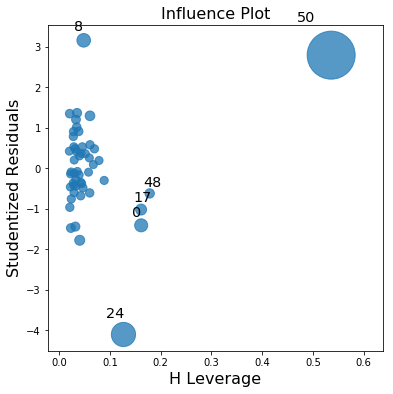

In [7]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
p1 = statsmodels.graphics.regressionplots.influence_plot(ols_res, ax=ax1)

## 误差平方 vs 杠杆值图 ##

http://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

可看出横轴为残差平方值（离群度），纵轴为杠杆值（x取值）

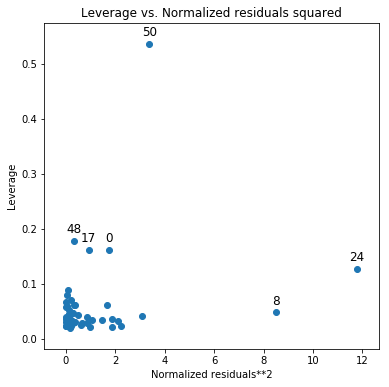

In [8]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111)
p2 = statsmodels.graphics.regressionplots.plot_leverage_resid2(ols_res, ax=ax2)

## 去除异常点，做OLS ##
去除24号样本后，回归效果明显提升（去除50号后回归效果变差）

In [9]:
filtered_data = origin_data.drop([24])

In [10]:
# 去除50号后R-squared下降至不到0.5，去除24号后上升至0.78
ols_model_2 = smf.ols(formula='crime ~ poverty + single', data=filtered_data)
ols_res_2 = ols_model_2.fit()
print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     85.25
Date:                Fri, 05 Oct 2018   Prob (F-statistic):           2.31e-16
Time:                        16:30:08   Log-Likelihood:                -337.03
No. Observations:                  50   AIC:                             680.1
Df Residuals:                      47   BIC:                             685.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1514.5030    166.109     -9.118      0.0